In [162]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb

%matplotlib inline

In [163]:
pokemon = pd.read_csv('./pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [164]:
base_color = sb.color_palette()[0]

In [165]:
get_order = pokemon['type_1'].value_counts().index
get_order

Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'poison', 'ground', 'fighting', 'dark', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

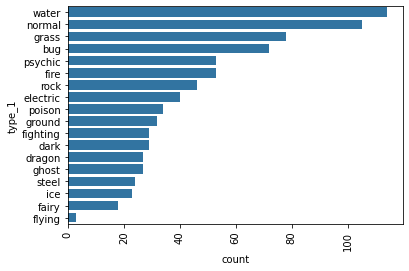

In [166]:
sb.countplot(data = pokemon,
             y = 'type_1',
             color = base_color,
             order= get_order)
plt.xticks(rotation = 90)

In [167]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name='type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [168]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

In [169]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

In [170]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

Text(0.5, 0, 'proportion')

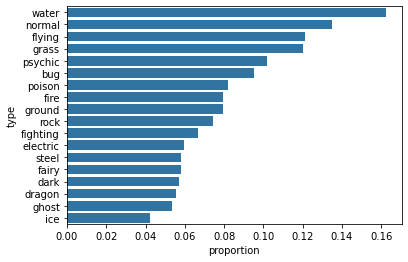

In [171]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order= type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

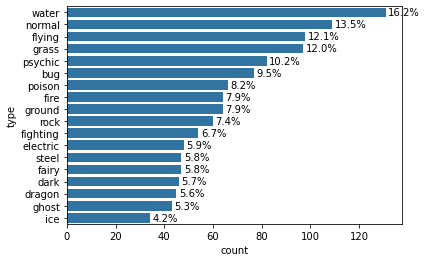

In [172]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order= type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_string, va = 'center')

/Users/amirpez/.conda/envs/pythonProject3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

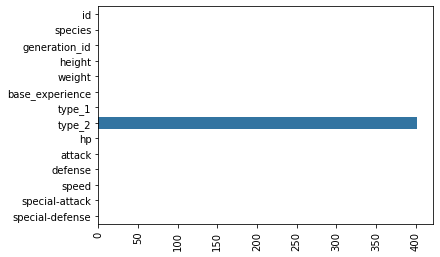

In [175]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts, na_counts.index.values, color= base_color)
plt.xticks(rotation = 90)



